# Algoritmes d’aprenentatge supervisat: Regressió


## Objectius
    Neteja i interpretació de les dades.
    Preprocessats.
    Creació de models de regressió (arbres de regressió, random forest, xarxes neuronals, altres models...).
    Utilització de les mètriques per interpretar els resultats.
    Estudi i modificació de paràmetres.

## Informació sobre el conjunt de dades i exploració

In [1]:
# Imprimir el fitxer txt
f = open('housing data description.txt', 'r')
f_content = f.read()
print (f_content)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Tancar el fitxer
f.close()

In [64]:
# Importació inicial de llibreries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro

In [4]:
# Càrrega del fitxer amb les dades
df = pd.read_csv('housing data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# Afegir nom de columnes al dataset
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Exploració de dades


Comprovació de dades nul·les

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.duplicated().sum()

0

Al no existir valors nuls ni duplicats, procedim al següent pas: realtizem un boxplot per explorar la distribució de les variables

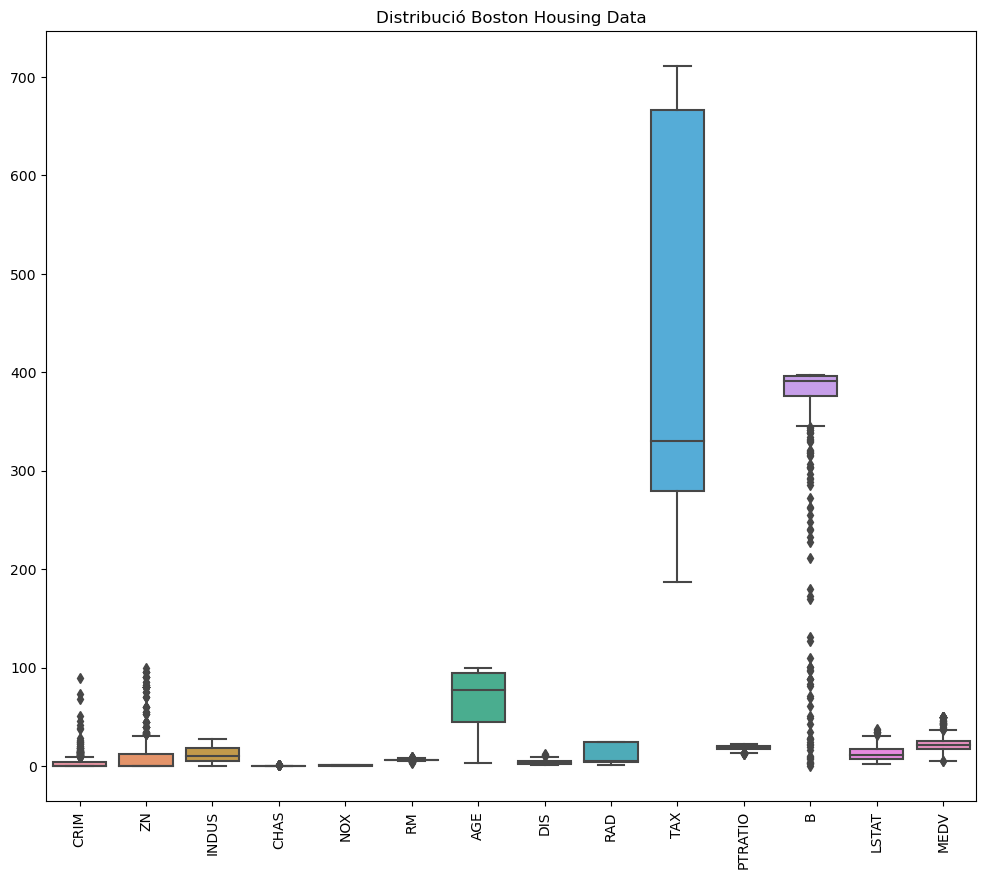

In [18]:
# Boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data=df)
plt.title('Distribució Boston Housing Data')
plt.xticks(rotation=90)
plt.show()

En el boxplot podem comprovar la presència de outliers en les variables:
<ul>
    <li>CRIM</li>
    <li>ZN</li>
    <li>B</li>
    <li>LSTAT</li>
    <li>MEDV</li>
</ul>

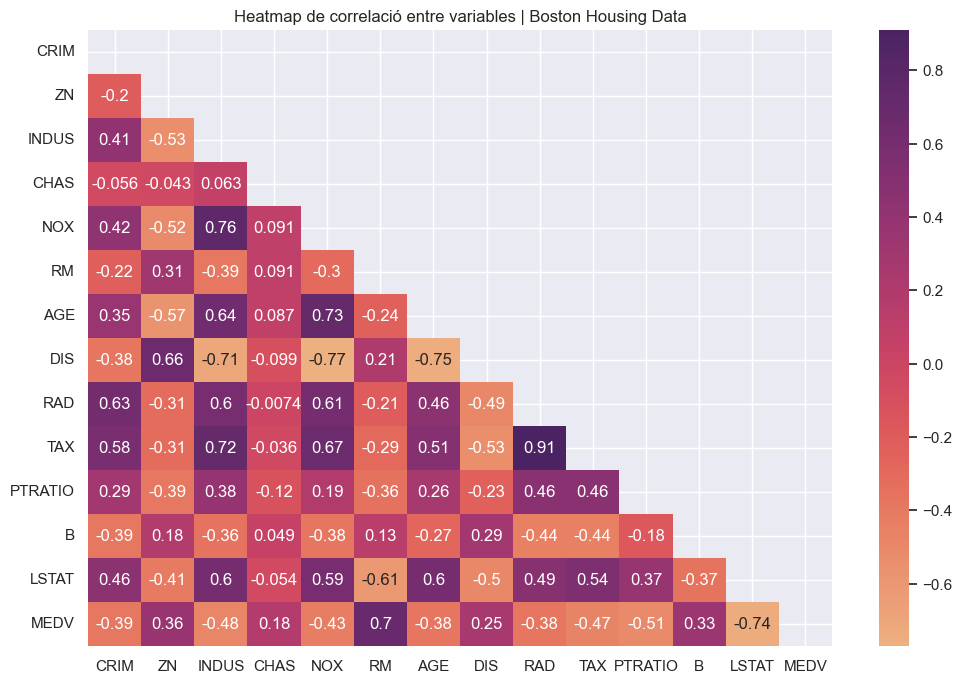

In [119]:
plt.figure(figsize=(12, 8))
matriz_corr = df.corr()

# Màscara per a ocultar la meitat superior del mapa de calor
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# MAPA DE CALOR
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(matriz_corr, annot=True, cmap=cmap, mask=mask)
plt.title('Heatmap de correlació entre variables | Boston Housing Data')
plt.show()

Les variables amb més <strong>correlació positiva</strong> són les següents:
<ul>
    <li>TAX i RAD: Correlació positiva forta - 0.91. Potser que l'accesibilitat a les autopistes (RAD) tingui una ttaxa d'impost sobre la propietat (variable TAX) alta</li>
    <li>NOX i INDUS: Correlació positiva moderada - 0.76, potser perquè en les àrees amb proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) hi ha més concentració d'òxids nítrics (variable NOX)</li>
    <li>NOX i AGE: Correlació positiva moderada - 0.73, potser en àrees on les vivendes són més antigües (variable AGE) existeix més concentració d'òxids nítrics (variable NOX)</li>
    <li>TAX i INDUS: Correlació positiva moderada - 0.72. Una possible explicació seria que en les àrees amb proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) tenen més taxa d'impost sobre la propietat (variable TAX)</li>

Les variables amb més <strong>correlació negativa</strong> són les següents:
<ul>
    <li>NOX i DIS: Correlació negativa moderada - 0.77. Potser que els lugars de més contaminació(NOX) són el que estan més menys distànica ponderada a cinc centres d'ocupació de Boston (DIS)</li>
    <li>AGE i DIS: Correlació negativa moderada - 0.75. Probablement les àrees on les vivendes són més antigües (variable AGE) estan a menys distànica ponderada a cinc centres d'ocupació de Boston (DIS) </li>
    <li>MDEV i LSTAT: Correlació negativa moderada - 0.74. Potser el valor mitjà de les vivendes ocupades pel propietari (MEDV) baixa quant més gran és el % de la població amb estatus més baix (LSTAT)</li>
    <li>INDUS i DIS: Correlació negativa moderada - 0.71. Suggereix que en les àrees amb més proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) estan mñes a prop dels cinc centres d'ocupació de Boston (DIS) </li>

Histograma de variables | Boston Housing Data


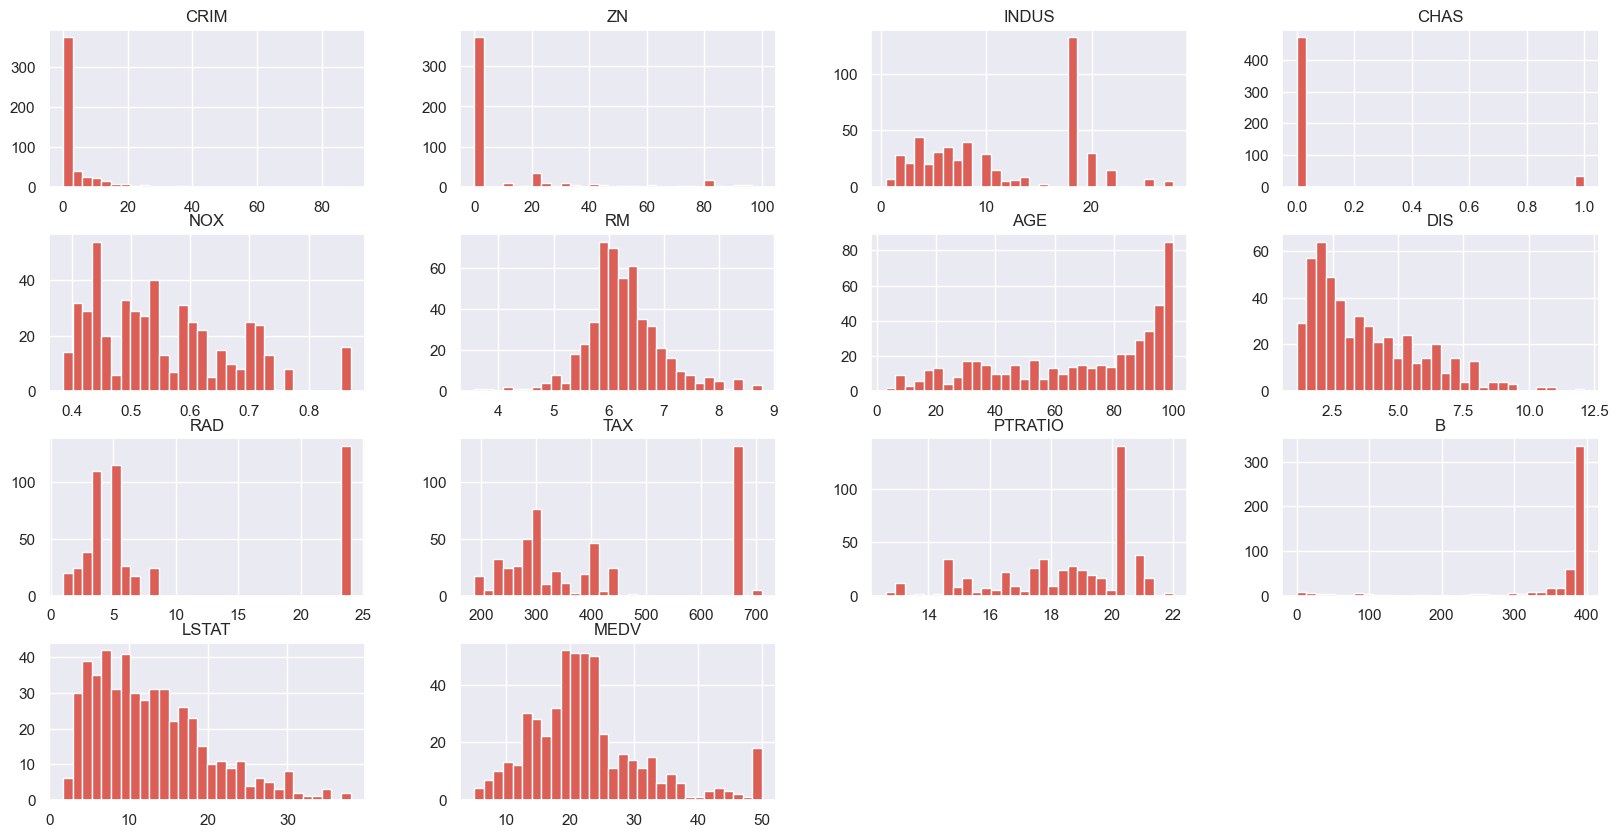

In [121]:
# Histograma
sns.set(style='darkgrid')
sns.set_palette("hls")

df.hist(figsize=(20, 10), bins=30)
print('Histograma de variables | Boston Housing Data')

plt.show()

Mirant l'histograma anterior, a simple vista les distribucions semblen no gaussianes, i per comprovar-ho aplicarem el test de Shapiro

In [96]:
from scipy.stats import shapiro

# Shapiro-Wilk Normality Test
for i in df.columns:
    stat, p = shapiro(df[i])
    print(f'Variable: {i}')
    print(f'Statistic=', stat, 'p-value=', p)
    if p > 0.05:
        print("La distribució probablement és gaussiana", end="\n\n")
    else:
        print("La distribució probablement no és gaussiana", end="\n\n")

Variable: CRIM
Statistic= 0.44996488094329834 p-value= 1.3285678005931464e-36
La distribució probablement no és gaussiana

Variable: ZN
Statistic= 0.5559463500976562 p-value= 7.882576753156324e-34
La distribució probablement no és gaussiana

Variable: INDUS
Statistic= 0.8997918367385864 p-value= 1.0642375893751083e-17
La distribució probablement no és gaussiana

Variable: CHAS
Statistic= 0.27476072311401367 p-value= 2.350467979135232e-40
La distribució probablement no és gaussiana

Variable: NOX
Statistic= 0.9356358051300049 p-value= 5.775851259944009e-14
La distribució probablement no és gaussiana

Variable: RM
Statistic= 0.9608709812164307 p-value= 2.4107271734408187e-10
La distribució probablement no és gaussiana

Variable: AGE
Statistic= 0.89201420545578 p-value= 2.2311304847966706e-18
La distribució probablement no és gaussiana

Variable: DIS
Statistic= 0.9032330513000488 p-value= 2.1851281171594835e-17
La distribució probablement no és gaussiana

Variable: RAD
Statistic= 0.679641

Efectivament no existeis distribució normal o gaussiana. Per acaba de saber el preprocessament que aplicarem, contabilitzarem el número d'outliers

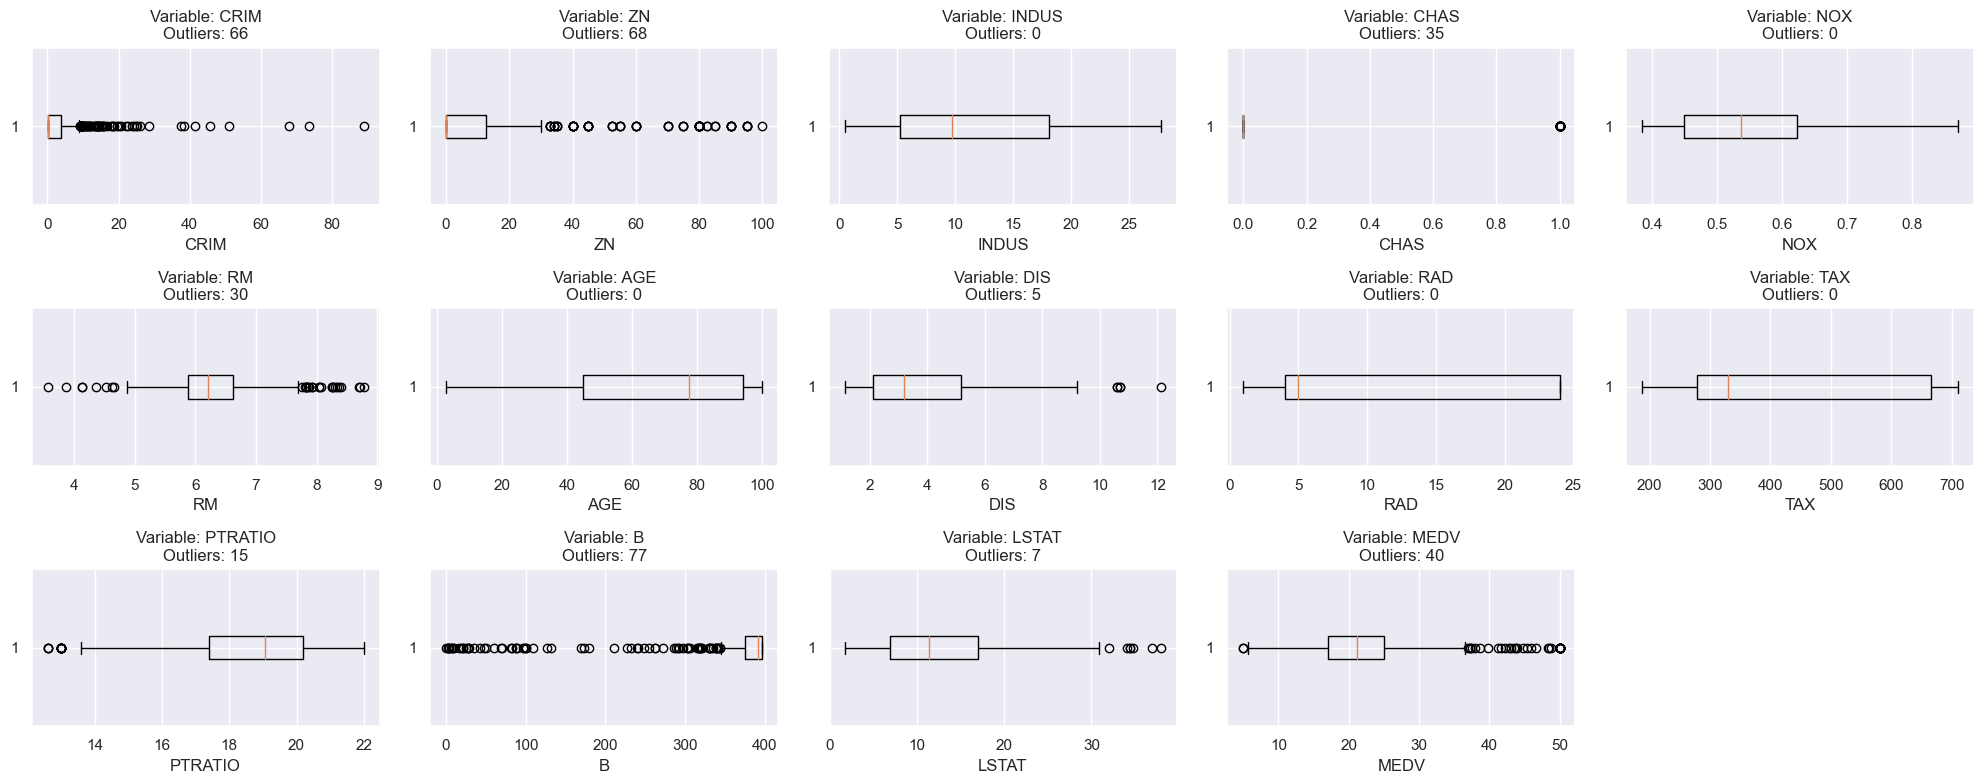

In [100]:
# Llista per contatge d'outliers
num_outliers = []

# Número de columnas per fila
columnes_per_fila = 5

# Calcula el número total de files necesarias
num_files = math.ceil(len(df.columns) / columnes_per_fila)

# Mides del canvas
plt.figure(figsize=(20, 8))

# Iteració per columnes amb contatge d'outliers
for i, column in enumerate(df.columns):
    # Càlcul d'el IQR per a cada columna
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Càlcul dels límits per detectar outliers
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR

    # Contatge de outliers amb append
    outliers = df[(df[column] < limit_inferior) | (df[column] > limit_superior)]
    num_outliers.append(len(outliers))

    # Pintar boxplots individuals
    plt.subplot(num_files, columnes_per_fila, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Variable: {column}\nOutliers: {len(outliers)}')
    plt.xlabel(column)

# Marge entre els subplots
plt.tight_layout()

plt.show()


Per les variables amb outliers --> CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT --> Transformació RobustScaler, per reduir l'efecte dels outliers

Per les variables sense outliers --> INDUS,NOX,AGE,TAX --> Transformación MinMaxSCaler

La variable CHAS, al ser dummie (1 i 0), no necessita transformació.

La variable RAD es una variable categoria ordinària i per tant no s'inclourà en l'anàlisi.

La variable MEDV (Valor mitjà de les llars ocupades pel propietari en milers de dòlars) és la variable target, és a dir, la que volem predir.

## Preprocessament de les dades

In [103]:
# Còpia de seguretat de les dades
df_pre = df.copy()


In [104]:
# Importar mòdul 'Preprocessing'
from sklearn import preprocessing


In [105]:
# MinMax Scaler
df_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

MinMax = preprocessing.MinMaxScaler().fit(df_pre[df_no_outliers])
df_pre[df_no_outliers] = MinMax.transform(df_pre[df_no_outliers])

df_pre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.067815,0,0.314815,6.575,0.641607,4.0900,1,0.208015,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.242302,0,0.172840,6.421,0.782698,4.9671,2,0.104962,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.242302,0,0.172840,7.185,0.599382,4.9671,2,0.104962,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.063050,0,0.150206,6.998,0.441813,6.0622,3,0.066794,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.063050,0,0.150206,7.147,0.528321,6.0622,3,0.066794,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.420455,0,0.386831,6.593,0.681771,2.4786,1,0.164122,21.0,391.99,9.67,22.4
502,0.04527,0.0,0.420455,0,0.386831,6.120,0.760041,2.2875,1,0.164122,21.0,396.90,9.08,20.6
503,0.06076,0.0,0.420455,0,0.386831,6.976,0.907312,2.1675,1,0.164122,21.0,396.90,5.64,23.9
504,0.10959,0.0,0.420455,0,0.386831,6.794,0.889804,2.3889,1,0.164122,21.0,393.45,6.48,22.0


In [107]:
# Crear datafram amb les variables mab outliers
df_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'RAD']
rob_scaler = preprocessing.RobustScaler().fit(df_pre[df_outliers])
df_pre[df_outliers] = rob_scaler.transform(df_pre[df_outliers])
df_pre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,-0.20,0.208015,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,-0.15,0.104962,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,-0.15,0.104962,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,-0.10,0.066794,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,-0.10,0.066794,-0.125000,0.261902,-0.602699,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,-0.20,0.164122,0.696429,0.026382,-0.168916,22.4
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,-0.20,0.164122,0.696429,0.261902,-0.227886,20.6
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,-0.20,0.164122,0.696429,0.261902,-0.571714,23.9
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,-0.20,0.164122,0.696429,0.096414,-0.487756,22.0


In [125]:
# Comprovar els datatypes
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


A continuació, visualitzarem els canvis abans i després del preprocessat del dataset

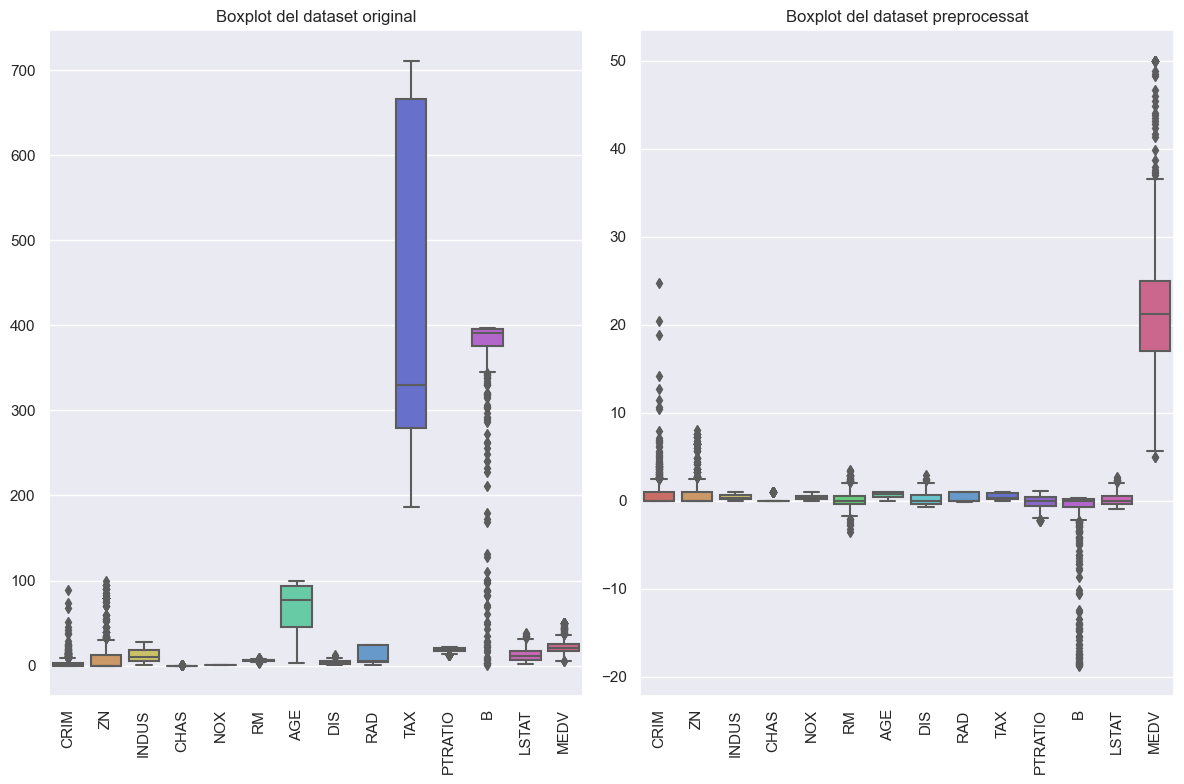

In [127]:
# Comparació de dades

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Boxplot original
sns.boxplot(data=df, ax=axes[0], palette='hls')
axes[0].set_title('Boxplot del dataset original')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot preprocessat
sns.boxplot(data=df_pre, ax=axes[1], palette='hls')
axes[1].set_title('Boxplot del dataset preprocessat')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Amb la comparació de boxplots veiem que la normalització de les dades ha estat ben succeïda amb una distribució similar. <br><br>
A continuació, analitzem els outliers:

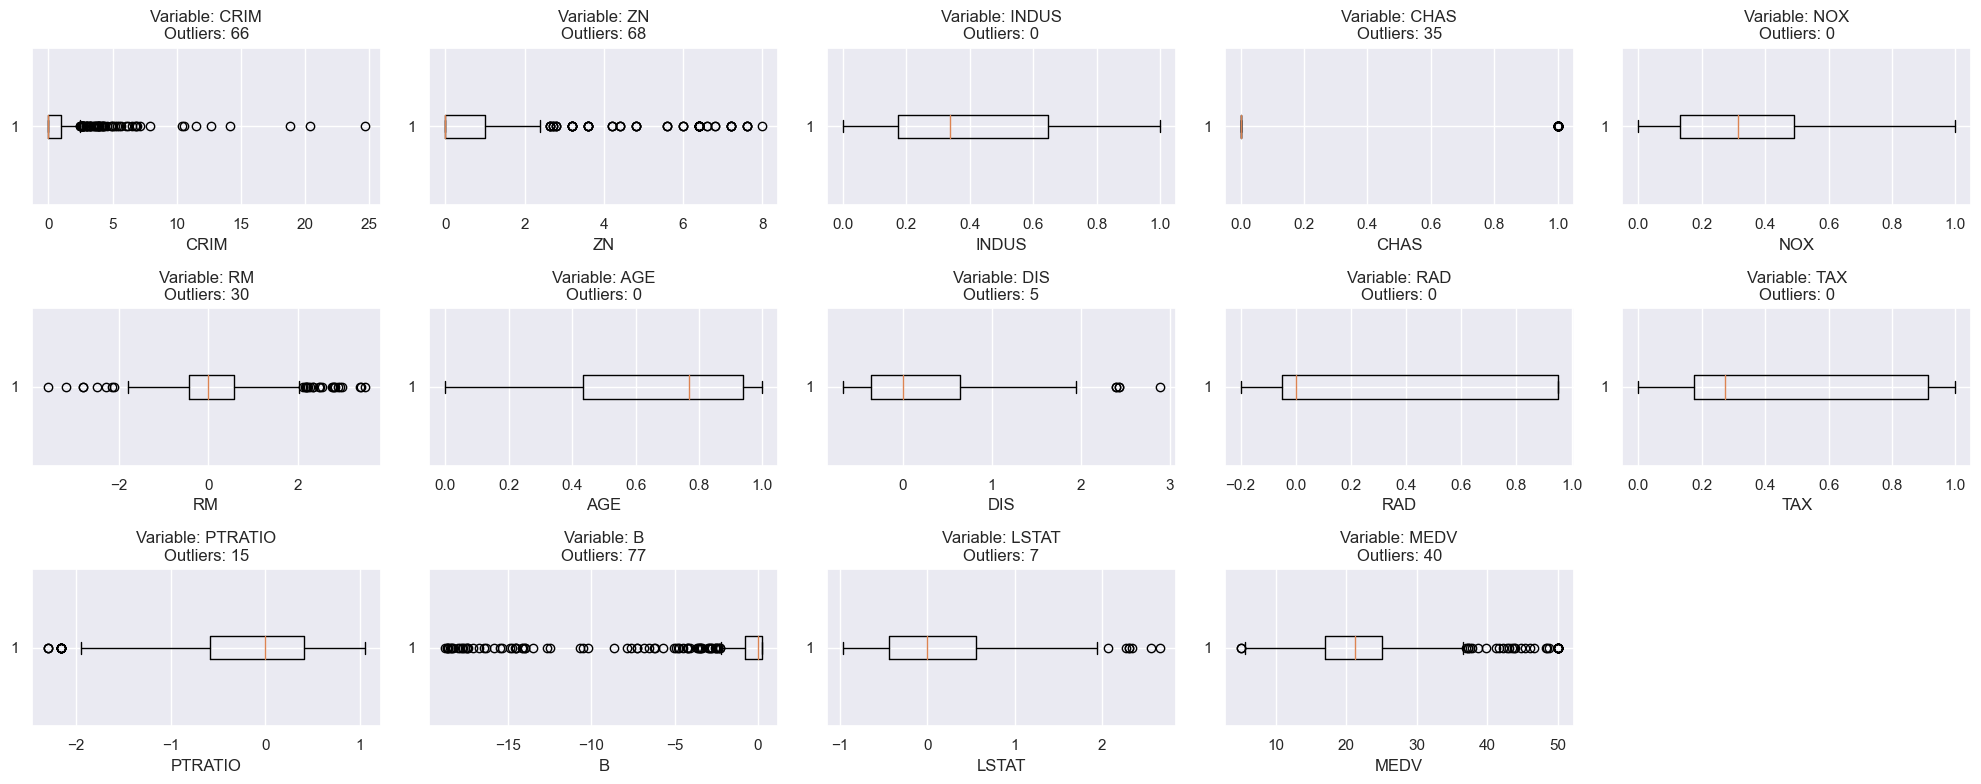

In [109]:
# Llista per contatge d'outliers
num_outliers = []

# Número de columnas per fila
columnes_per_fila = 5

# Calcula el número total de files necesarias
num_files = math.ceil(len(df_pre.columns) / columnes_per_fila)

# Mides del canvas
plt.figure(figsize=(20, 8))

# Iteració per columnes amb contatge d'outliers
for i, column in enumerate(df_pre.columns):
    # Càlcul d'el IQR per a cada columna
    Q1 = df_pre[column].quantile(0.25)
    Q3 = df_pre[column].quantile(0.75)
    IQR = Q3 - Q1

    # Càlcul dels límits per detectar outliers
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR

    # Contatge de outliers amb append
    outliers = df_pre[(df_pre[column] < limit_inferior) | (df_pre[column] > limit_superior)]
    num_outliers.append(len(outliers))

    # Pintar boxplots individuals
    plt.subplot(num_files, columnes_per_fila, i + 1)
    plt.boxplot(df_pre[column], vert=False)
    plt.title(f'Variable: {column}\nOutliers: {len(outliers)}')
    plt.xlabel(column)

# Marge entre els subplots
plt.tight_layout()

plt.show()

Segueix havent un número considerable d'outliers en CRIM, ZN, RM i B a pesar d'haver segut escalada. Per visualitzar les dades abans i després del preprocessament, 

# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

### Train and test
Es divideix el dataset en un 20% per train i un 80% per test.

In [130]:
# Importem llibreries necessàries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
# Train and test 20%-80%, amb random_state per reproduir sempre el mateix resultat

x = df_pre.drop(['MEDV'], axis = 1)
y = df_pre[['MEDV']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 3)

print("Mostra per TRAIN (sense MEDV, 80%): ", len(x_train), "registres")
print("Mostra per TEST  (sense MEDV, 20%): ", len(x_test), "registres")
print("="*100)
print("Mostra per TRAIN (només MEDV, 80%): ", len(y_train), "registres")
print("Mostra per TEST  (només MEDV, 20%): ", len(y_test), "registres")

Mostra per TRAIN (sense MEDV, 80%):  404 registres
Mostra per TEST  (sense MEDV, 20%):  102 registres
Mostra per TRAIN (només MEDV, 80%):  404 registres
Mostra per TEST  (només MEDV, 20%):  102 registres


In [194]:
# Llibreries sklearn per linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir les dades en conjunts d'entrenament i prova
x = df_pre.drop(columns=['MEDV'])
y = df_pre['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Crear un model de regressió lineal múltiple
model1 = LinearRegression()

# Entrenar el model
model1.fit(x_train, y_train)

# Fer prediccions
y_pred1 = model1.predict(X_test)

# Avalua el model
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 - Regressió Lineal Múltiple")
print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared (R2): {r2_1}")


Model 1 - Regressió Lineal Múltiple
Mean Squared Error (MSE): 16.94307301383377
R-squared (R2): 0.7952617563243859


Mean Squared Error (MSE): En aquest cas, un valor de 16.94 significa que, en mitjana, les prediccions d'aquest model estan equivocades en aproximadament 16.94 milers de dòlars quan intenta predir el preu d'una casa. Potser un MSE més baix seria millor al ser més precís però és acceptable.<br/>


R-squared (R2): En aquest context, un valor de R2 d'aproximadament 0.795 significa que el nostre model és capaç d'explicar aproximadament el 79.5% de la variabilitat observada en els preus de les cases, és a dir, que les variables com el nombre de habirtacions de les cases, els impostos, etc., que estem utilitzant són útils per predir els preus de les cases (un 1 significaria que el model ho explica tot perfectament). 

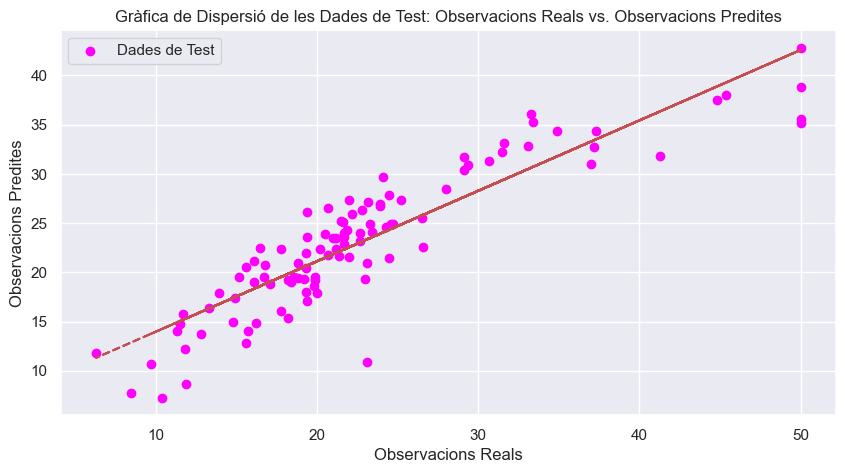

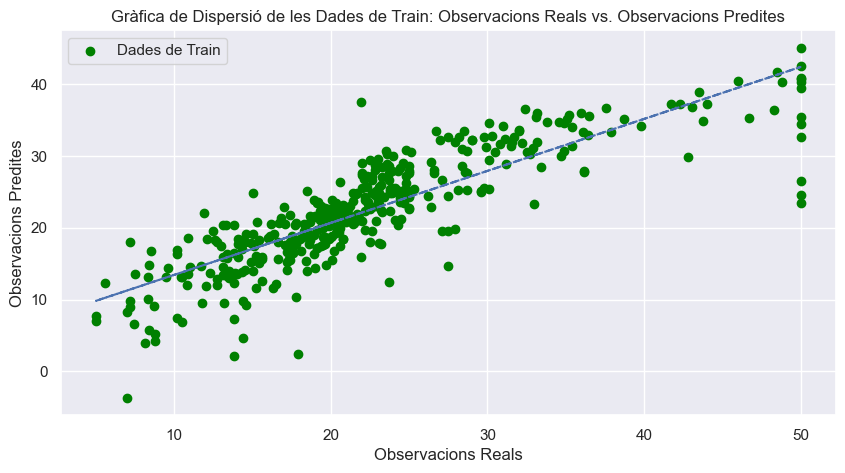

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Gràfica de dispersió per a les dades de Test
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred1, c='magenta', label='Dades de Test')
plt.xlabel("Observacions Reals")
plt.ylabel("Observacions Predites")
plt.title("Gràfica de Dispersió de les Dades de Test: Observacions Reals vs. Observacions Predites")
plt.legend()

# Línia de regressió per a les dades de Test
z = np.polyfit(y_test, y_pred1, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")

plt.grid(True)
plt.show()

# Gràfica de dispersió per a les dades de Train 
plt.figure(figsize=(10, 5))
y_pred_train = model1.predict(x_train) 
plt.scatter(y_train, y_pred_train, c='green', label="Dades de Train")
plt.xlabel("Observacions Reals")
plt.ylabel("Observacions Predites")
plt.title("Gràfica de Dispersió de les Dades de Train: Observacions Reals vs. Observacions Predites")
plt.legend()

# Línia de regressió per a les Dades de Train
z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "b--")

plt.grid(True)
plt.show()


En el scatterplot podem veure que el model s'ajusta bé tot i que hi ha alguns outliers. A continuació farem una regressió Lasso, que penalitza els coeficients del model que són molt grans, portant-los a zero si són poc rellevants. Això pot ajudar a evitar l'overfitting i facilita la simplicació del model.
Farem dues anàlisis amb la regressió Lasso:
<ol>
    <li>Hiperparàmetre alpha = 0.5</li>
    <li>Hiperparàmetre alpha = 1.0</li>
</ol>

In [181]:
# Importar la llibreria per a la regressió Lasso
from sklearn.linear_model import Lasso

# Dividir les dades en conjunts d'entrenament i prova
X = df_pre.drop(columns=['MEDV'])
y = df_pre['MEDV']
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Crear un model de regressió Lasso
model_lasso = Lasso(alpha=0.5)

# Entrenar el model
model_lasso.fit(x_train, y_train)

# Fer prediccions
y_pred_lasso = model_lasso.predict(X_test)

# Avalua el model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Model de Regressió Lasso amb alpha = 0.5")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")


Model de Regressió Lasso amb alpha = 0.5
Mean Squared Error (MSE): 21.948385216291747
R-squared (R2): 0.7347781103799549


In [197]:
# Importar la llibreria per a la regressió Lasso
from sklearn.linear_model import Lasso

# Dividir les dades en conjunts d'entrenament i prova
X = df_pre.drop(columns=['MEDV'])
y = df_pre['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Crear un model de regressió Lasso
model_lasso = Lasso(alpha=1.0)

# Entrenar el model
model_lasso.fit(x_train, y_train)

# Fer prediccions
y_pred_lasso = model_lasso.predict(X_test)

# Avalua el model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Model de Regressió Lasso amb alpha=1.0")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")


Model de Regressió Lasso amb alpha=1.0
Mean Squared Error (MSE): 25.164545631579912
R-squared (R2): 0.6959143792098478


Veiem que el model, amb un valor alpha de 0.5, s'ajusta millor a la realitat que la regressió lineal simple realitzada abans. El valor alpha modera el nivell de regularització aplicat al model (és un hiperparàmetre modificable).

Amb un valor alpha de 1.0 i els resultants empitjoren el rendiment del model:

<strong>Amb Alpha = 0.5:</strong>

MSE = 21.9484

R2 = 0.7348

<strong>Amb Alpha = 1.0:</strong>

MSE = 25.1645

R2 = 0.6959

Amb un valor d'alpha de 0.5, el model Lasso proporciona resultats millors en termes de precisió (MSE més baix) i capacitat de modelització (R2 més alt), i per tant millora el rendiment del model.


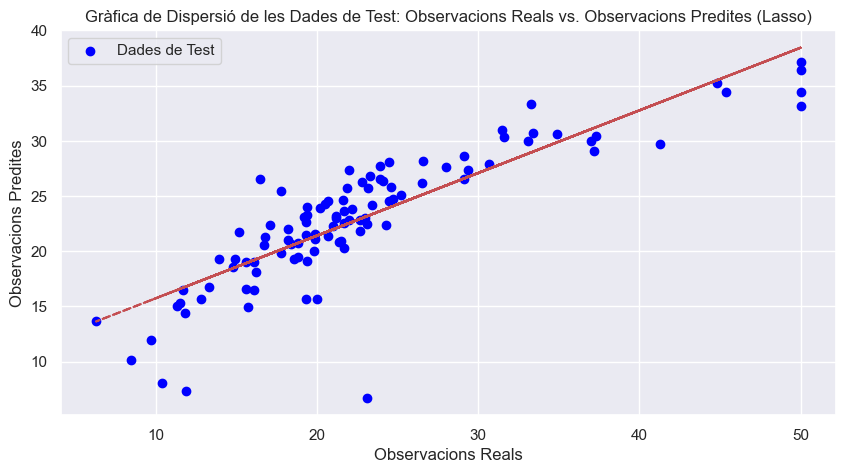

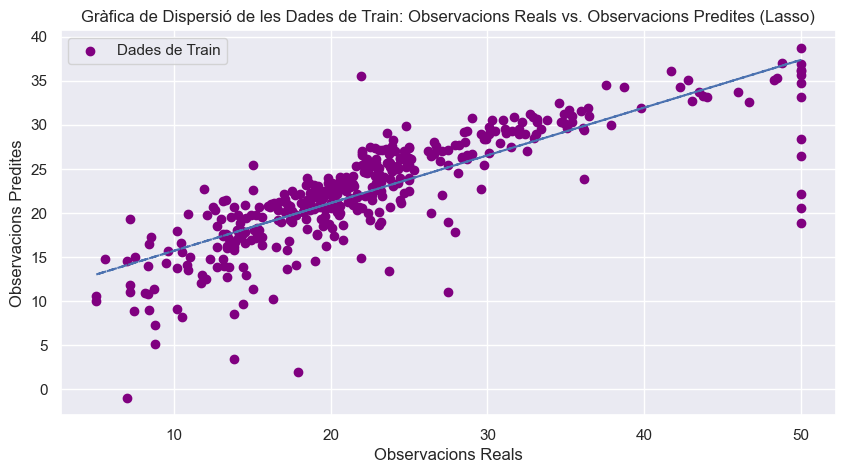

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Fer prediccions amb el model Lasso
y_pred_lasso_test = model_lasso.predict(X_test)
y_pred_lasso_train = model_lasso.predict(x_train)

# Gràfica de dispersió per a les dades de Test
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lasso_test, c='blue', label='Dades de Test')
plt.xlabel("Observacions Reals")
plt.ylabel("Observacions Predites")
plt.title("Gràfica de Dispersió de les Dades de Test: Observacions Reals vs. Observacions Predites (Lasso)")
plt.legend()

# Línia de regressió per a les dades de Test
z_test = np.polyfit(y_test, y_pred_lasso_test, 1)
p_test = np.poly1d(z_test)
plt.plot(y_test, p_test(y_test), "r--")

plt.grid(True)
plt.show()

# Gràfica de dispersió per a les dades de Train
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_lasso_train, c='purple', label="Dades de Train")
plt.xlabel("Observacions Reals")
plt.ylabel("Observacions Predites")
plt.title("Gràfica de Dispersió de les Dades de Train: Observacions Reals vs. Observacions Predites (Lasso)")
plt.legend()

# Línia de regressió per a les Dades de Train
z_train = np.polyfit(y_train, y_pred_lasso_train, 1)
p_train = np.poly1d(z_train)
plt.plot(y_train, p_train(y_train), "b--")

plt.grid(True)
plt.show()


Els resultats són similars a la regressió lineal simple. La regressió Lasso (gràfica de dalt) mostra com les observacions s'adapten millor al model 

# Exercici 2
Compara’ls en base al MSE i al R2.

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediccions del model de Regressió Lasso amb alpha 0.5
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Prediccions del model de Regressió Lineal Múltiple (Model 1)
mse_linear = mean_squared_error(y_test, y_pred1)
r2_linear = r2_score(y_test, y_pred1)

print("Model de Regressió Lasso amb alpha = 0.5:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

print("\nModel de Regressió Lineal Múltiple (Model 1):")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")


Model de Regressió Lasso amb alpha = 0.5:
Mean Squared Error (MSE): 25.164545631579912
R-squared (R2): 0.6959143792098478

Model de Regressió Lineal Múltiple (Model 1):
Mean Squared Error (MSE): 16.94307301383377
R-squared (R2): 0.7952617563243859


El model de Regressió Lasso amb un alpha de 0.5 ens dóna un Mean Squared Error de 25.16 i un R2 de 0.70. En canvi, el model de Regressió Lineal Múltiple (anomenat Model 1) té un MSE de 16.94 i un R2 de 0.80.

Si comparem els dos models, veiem que el model de Regressió Lasso té un MSE més alt, el que significa que les prediccions estan una mica més allunyades de les observacions reals. A més a més, l'R-squared del Lasso és una mica més baix, indicant que aquest model explica una part lleugerament menor de la variabilitat en les dades de resposta.

Així que, en base a aquestes mètriques, el model de Regressió Lineal Múltiple (Model 1) té millors habilitats predictives i de modelització per a aquest conjunt de dades concret, tot i que ambdos models ofereixen unes capacitats predictives similars, com es demostra en el següent scatterplot.

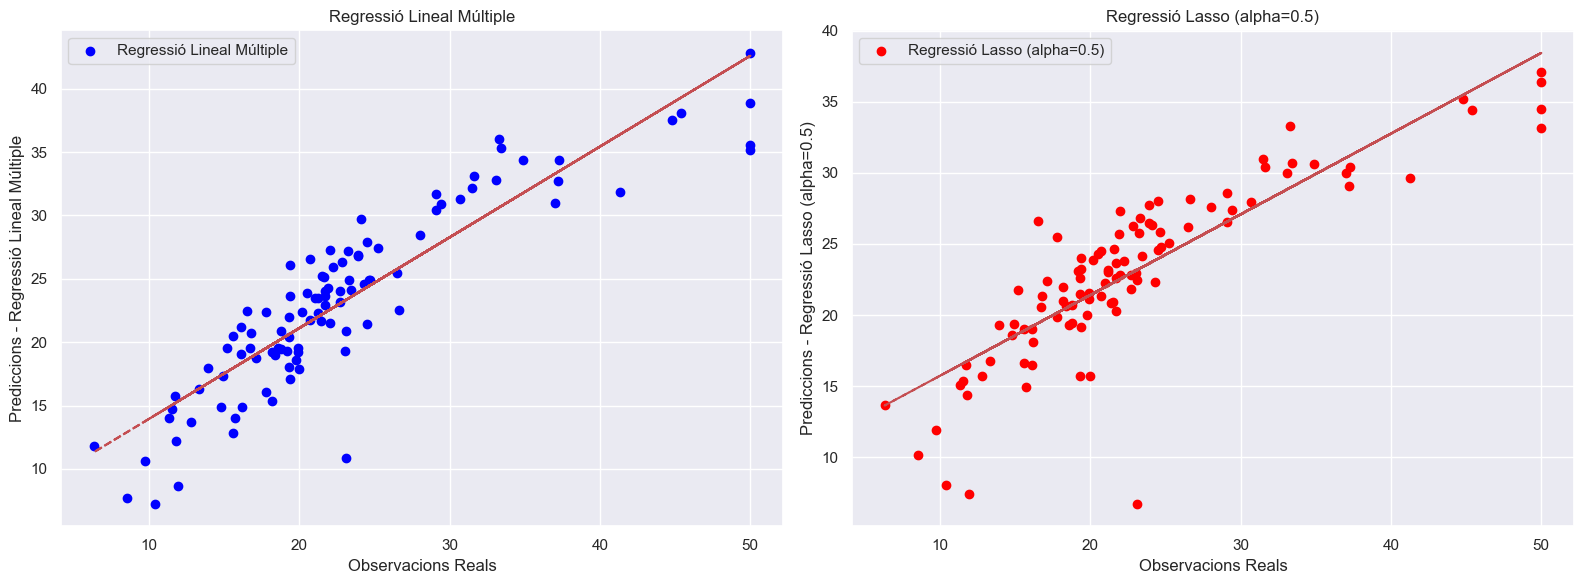

In [199]:
import matplotlib.pyplot as plt
import numpy as np

# Gràfiques de dispersió
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gràfica per a la regressió lineal múltiple
axes[0].scatter(y_test, y_pred1, c='blue', label='Regressió Lineal Múltiple')
axes[0].set_xlabel("Observacions Reals")
axes[0].set_ylabel("Prediccions - Regressió Lineal Múltiple")
axes[0].set_title("Regressió Lineal Múltiple")
z1 = np.polyfit(y_test, y_pred1, 1)
p1 = np.poly1d(z1)
axes[0].plot(y_test, p1(y_test), "r--")
axes[0].legend()
axes[0].grid(True)

# Gràfica per a la regressió Lasso (alpha=0.5)
axes[1].scatter(y_test, y_pred_lasso, c='red', label='Regressió Lasso (alpha=0.5)')
axes[1].set_xlabel("Observacions Reals")
axes[1].set_ylabel("Prediccions - Regressió Lasso (alpha=0.5)")
axes[1].set_title("Regressió Lasso (alpha=0.5)")
z2 = np.polyfit(y_test, y_pred_lasso, 1)
p2 = np.poly1d(z2)
axes[1].plot(y_test, p2(y_test), "r--")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.







# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.


# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)}

In [3]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
a